# Network Growth Models

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## 🥅 Preferential Attachment Growth Model (Barabási–Albert Model)
> Nodes are added one at a time and preferentially attach to existing nodes with high degree.

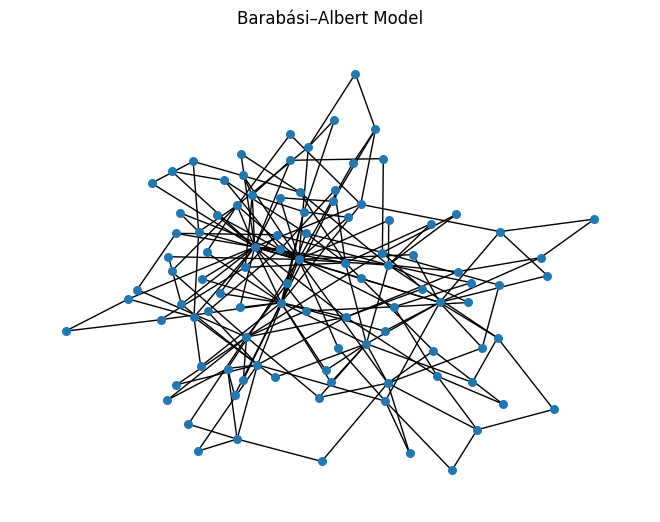

In [2]:
# Parameters
n = 100  # Total nodes
m = 2    # Edges to attach from new node to existing nodes

# Generate graph
G_ba = nx.barabasi_albert_graph(n, m)

# Visualize
nx.draw(G_ba, node_size=30)
plt.title("Barabási–Albert Model")
plt.show()


## 🪱 Erdős–Rényi Model (Random Graph)
> This model adds edges between nodes randomly.

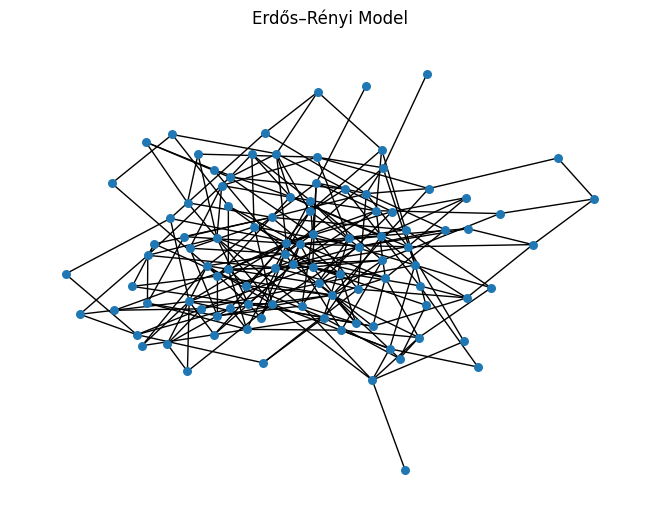

In [3]:
# Parameters
n = 100  # Number of nodes
p = 0.05  # Probability of edge creation

# Generate graph
G_er = nx.erdos_renyi_graph(n, p)

# Visualize
nx.draw(G_er, node_size=30)
plt.title("Erdős–Rényi Model")
plt.show()


## 🦐 Watts–Strogatz Model (Small-World Network)
> Starts with a regular lattice and rewires edges randomly to introduce shortcuts.

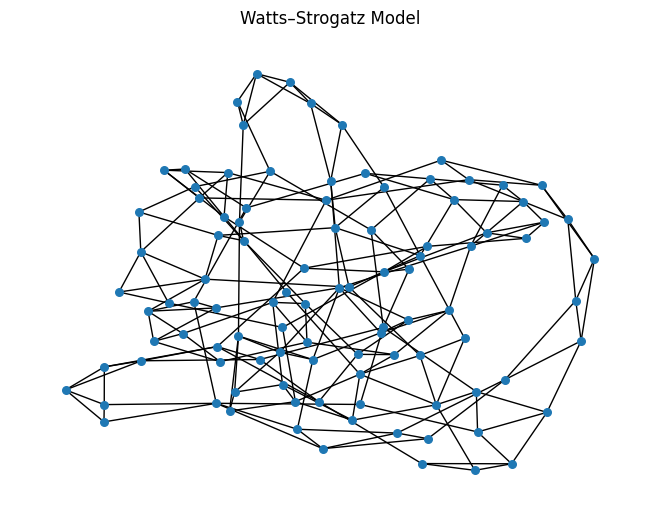

In [4]:
# Parameters
n = 100  # Number of nodes
k = 4    # Each node is connected to k nearest neighbors
p = 0.1  # Probability of rewiring

# Generate graph
# Starts with ring lattice rewiring with probability p
G_ws = nx.watts_strogatz_graph(n, k, p)

# Visualize
nx.draw(G_ws, node_size=30)
plt.title("Watts–Strogatz Model")
plt.show()


## ⚙️ Uniform Random Attachment
> Each new node connects to an existing node chosen uniformly at random.

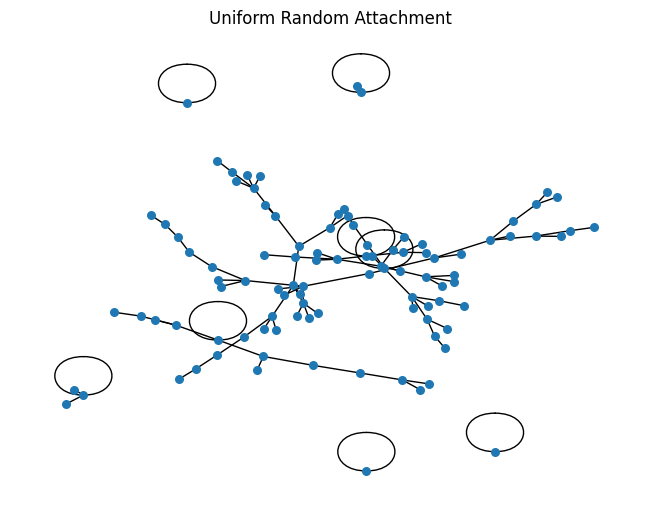

In [5]:
def uniform_random_attachment(n):
    G = nx.Graph()
    G.add_node(0)

    for i in range(1, n):
        G.add_node(i)
        target = random.choice(list(G.nodes))
        G.add_edge(i, target)

    return G

G_ura = uniform_random_attachment(100)
nx.draw(G_ura, node_size=30)
plt.title("Uniform Random Attachment")
plt.show()


## 📊 Multiplicative Growth Model
> Each node’s degree grows multiplicatively over time. This is more abstract, often used in weighted networks.

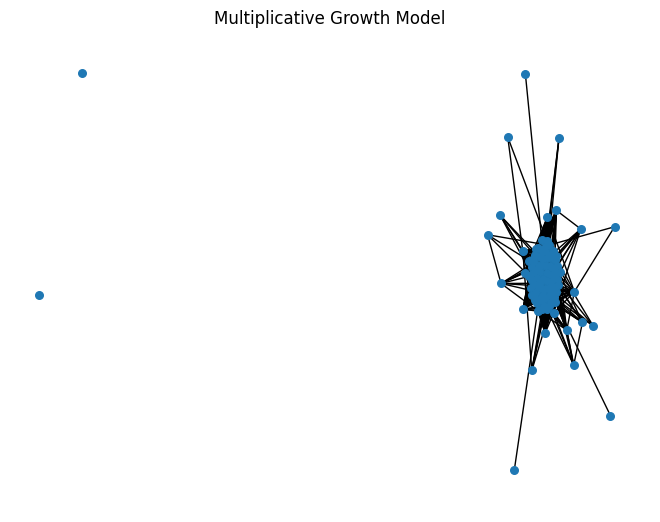

In [6]:
def multiplicative_growth(n, initial_weight=1.0, growth_factor=1.2):
    G = nx.Graph()
    G.add_node(0)

    weights = {0: initial_weight}

    for i in range(1, n):
        G.add_node(i)
        # Connect to all existing nodes with weight proportional to their current weight
        for j in G.nodes:
            if i != j:
                prob = weights.get(j, initial_weight)
                if random.random() < prob / (growth_factor * n):
                    G.add_edge(i, j)
        weights[i] = initial_weight * (growth_factor ** i)

    return G

G_mgm = multiplicative_growth(100)
nx.draw(G_mgm, node_size=30)
plt.title("Multiplicative Growth Model")
plt.show()


## 🧬 Yule–Simon Model
> A model of preferential attachment with a probability of introducing new nodes vs reinforcing existing ones.

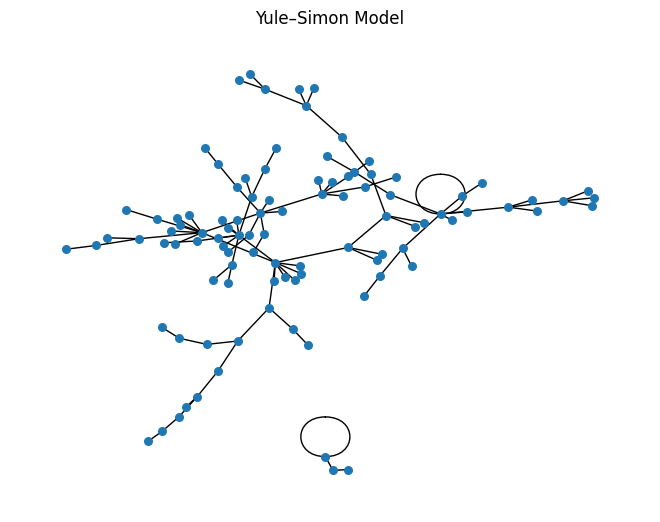

In [7]:
def yule_simon_model(n, alpha=0.5):
    G = nx.Graph()
    G.add_node(0)

    for i in range(1, n):
        G.add_node(i)
        if random.random() < alpha:
            # Attach to a random node
            target = random.choice(list(G.nodes))
        else:
            # Preferential attachment
            degrees = dict(G.degree())
            total = sum(degrees.values())
            probs = [degrees[node] / total for node in G.nodes]
            target = random.choices(list(G.nodes), weights=probs, k=1)[0]
        G.add_edge(i, target)

    return G

G_ys = yule_simon_model(100)
nx.draw(G_ys, node_size=30)
plt.title("Yule–Simon Model")
plt.show()


## 🧪 Specialization Model
> Nodes specialize by duplicating and modifying their connections.

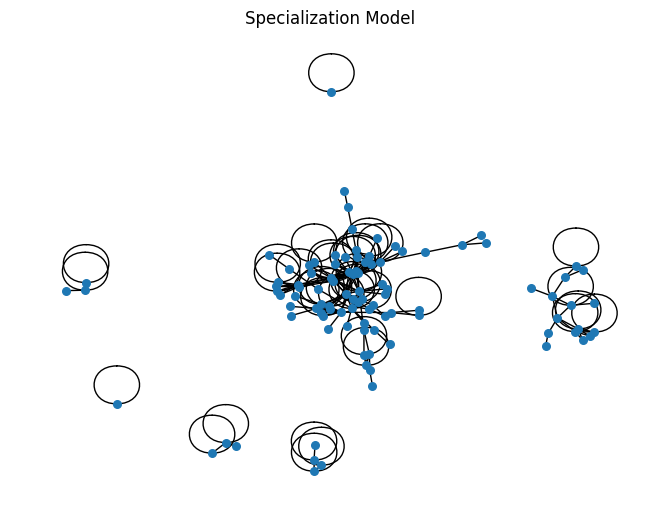

In [8]:
def specialization_model(n, duplication_prob=0.3):
    G = nx.Graph()
    G.add_node(0)

    for i in range(1, n):
        G.add_node(i)
        # Connect to a random existing node
        target = random.choice(list(G.nodes))
        G.add_edge(i, target)

        # With some probability, duplicate connections
        if random.random() < duplication_prob:
            neighbors = list(G.neighbors(target))
            for neighbor in neighbors:
                G.add_edge(i, neighbor)

    return G

G_spec = specialization_model(100)
nx.draw(G_spec, node_size=30)
plt.title("Specialization Model")
plt.show()


## 🌀 Ring Lattice
> A regular graph where each node is connected to its 𝑘 nearest neighbors in a ring topology.

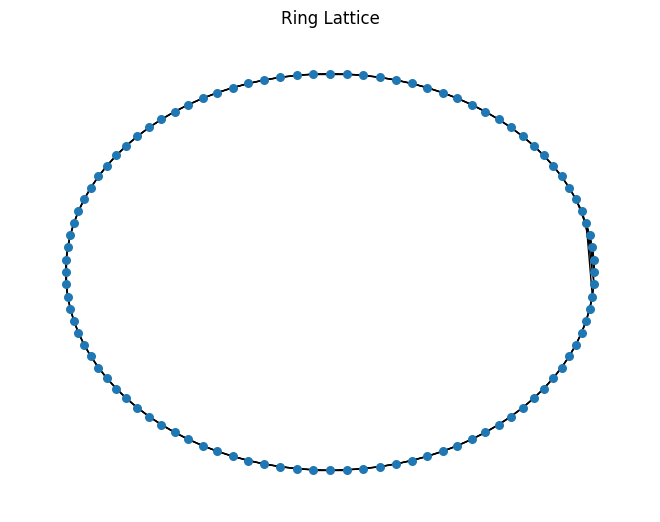

In [9]:
def ring_lattice(n, k):
    G = nx.Graph()
    for i in range(n):
        for j in range(1, k // 2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
    return G

G_ring = ring_lattice(100, 4)
nx.draw_circular(G_ring, node_size=30)
plt.title("Ring Lattice")
plt.show()


## 📚 Prices Model
> A precursor to the Barabási–Albert model, where nodes attach preferentially based on degree, but with a tunable initial attractiveness.

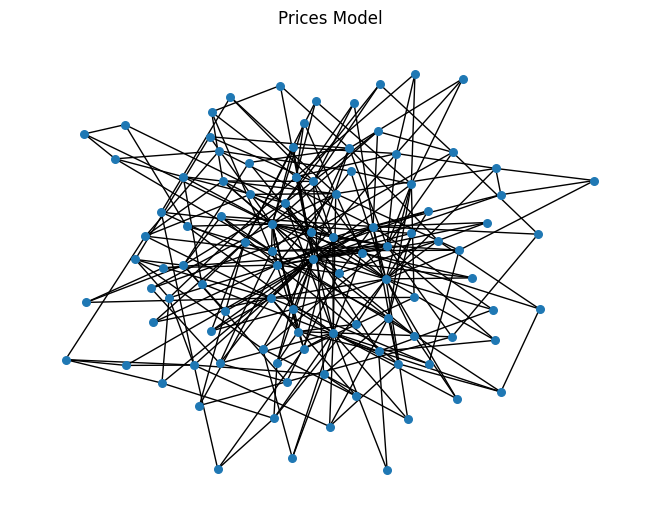

In [10]:
def prices_model(n, m, a=1.0):
    G = nx.Graph()
    G.add_nodes_from(range(m))
    for i in range(m):
        for j in range(i):
            G.add_edge(i, j)

    for i in range(m, n):
        G.add_node(i)
        degrees = dict(G.degree())
        total = sum([deg + a for deg in degrees.values()])
        probs = [(degrees[node] + a) / total for node in G.nodes]
        targets = random.choices(list(G.nodes), weights=probs, k=m)
        for t in targets:
            G.add_edge(i, t)

    return G

G_prices = prices_model(100, 3)
nx.draw(G_prices, node_size=30)
plt.title("Prices Model")
plt.show()


## 🌍 Local-World Model
> Nodes attach preferentially within a randomly selected local subset of the network.

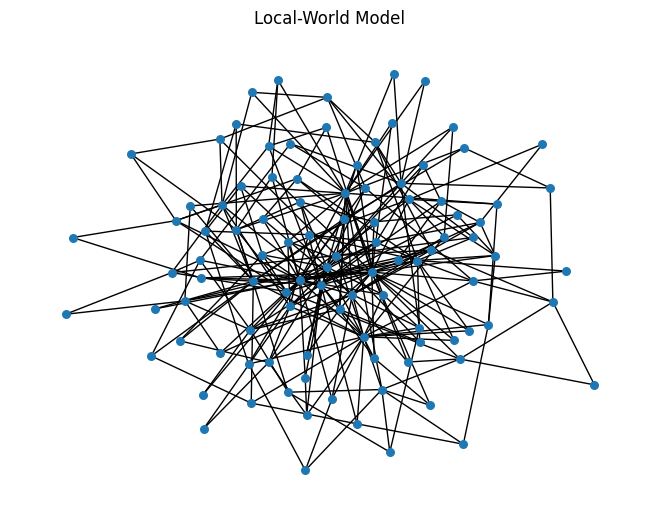

In [12]:
def local_world_model(n, m, local_size):
    G = nx.Graph()
    G.add_nodes_from(range(m))
    for i in range(m):
        for j in range(i):
            G.add_edge(i, j)

    for i in range(m, n):
        G.add_node(i)
        local_nodes = random.sample(list(G.nodes), min(local_size, len(G)))
        degrees = dict(G.degree(local_nodes))
        total = sum(degrees.values())
        if total == 0:
            targets = random.sample(local_nodes, m)
        else:
            probs = [degrees[node] / total for node in local_nodes]
            targets = random.choices(local_nodes, weights=probs, k=m)
        for t in targets:
            G.add_edge(i, t)

    return G

G_local = local_world_model(100, 3, 20)
nx.draw(G_local, node_size=30)
plt.title("Local-World Model")
plt.show()


## 🧩 Edging in Preferential Attachment
> A variation where new nodes connect preferentially, and additional edges are added between existing nodes.

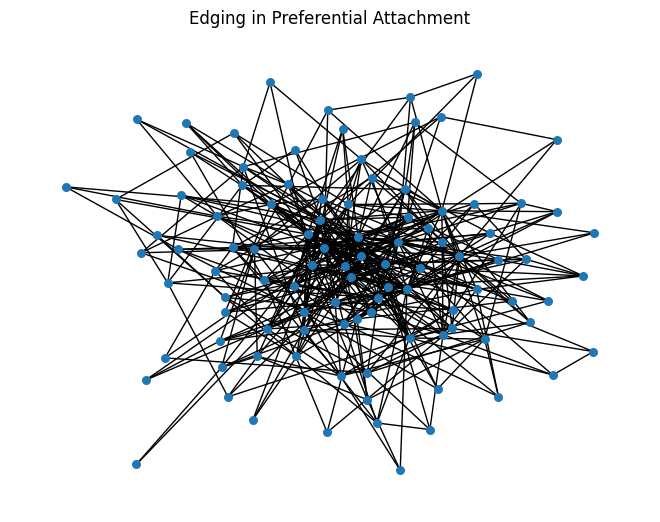

In [11]:
def edging_preferential_attachment(n, m, extra_edges=1):
    G = nx.barabasi_albert_graph(m + extra_edges, m)

    for i in range(m + extra_edges, n):
        G.add_node(i)
        degrees = dict(G.degree())
        total = sum(degrees.values())
        probs = [degrees[node] / total for node in G.nodes]
        targets = random.choices(list(G.nodes), weights=probs, k=m)
        for t in targets:
            G.add_edge(i, t)

        # Add extra edges between existing nodes
        for _ in range(extra_edges):
            u, v = random.sample(list(G.nodes), 2)
            if not G.has_edge(u, v):
                G.add_edge(u, v)

    return G

G_edging = edging_preferential_attachment(100, 3, extra_edges=2)
nx.draw(G_edging, node_size=30)
plt.title("Edging in Preferential Attachment")
plt.show()
